# **Homework Assignment - *Do Androids Dream of Electric Sheep?***

-------------------------------------  

"Do Androids Dream of Electric Sheep?" – the famous title of Philip K. Dick’s novel – raises a fascinating question: if artificial intelligence could dream, what would it see?  

In this assignment, we explore a phenomenon known as **neural network dreams**, where instead of optimizing a neural network's weights, we **optimize the input itself** to achieve a desired classification outcome. Given a fully trained MNIST classification network, your goal is to manipulate its inputs so that it confidently predicts each digit from 0 to 9, starting from pure noise.  

## **Tasks Description**  

During this class we designed and trained a **MNIST classification neural network**, which takes a **batch of grayscale images** of size **$28 \times 28$** as input and outputs a probability distribution over the 10 digit classes (0–9). However, instead of using real MNIST images, you will **treat the input batch itself as a set of trainable parameters** and optimize it so that the network classifies each image as a specific digit.  

1. Your first task is to generate **a batch of 10 images**, where each image is
   classified as one of the digits **0, 1, 2, ..., 9**, starting from an initial batch of ten random Gaussian noise images.  

   Discuss the following question: do the generated images resemble real MNIST digits? Why or why not?  

2. Discuss, how you would approach a second task of
   generating an image that   
   bares similarity to two or more digits simultaneously. **Implement your idea to see the results.**

3. Third task: repeat the previous tasks with an additional L2 penalty on noise within the images. Experiment with adding `lambda_l2 * dreamed_input_batch.pow(2).mean()` loss term, with `lambda_l2` being the penalty cooefficient within an exponential progression, say from 0.001 to 10.0. Are the new digits recognized correctly? How does the penalty impact the digit quality? Explain.

### **Optimization Process for Task 1**  

1. Start with a **batch of 10 random Gaussian noise images** as the initial input and $(0, 1, 2, \ldots, 9)$ as the expected output batch of target digits.  
2. Define the objective: maximize the neural network's confidence for the corresponding target digit for each image in the batch.  
3. Use **gradient descent** to modify the pixels in each image, making the network classify each one as the assigned digit.  
4. Repeat until the network assigns suffieciently high confidence to each image’s target class.  

### **Implementation Details**  

- The neural network weights **must remain frozen** during optimization. You are modifying only the input images.  
- The loss function should be the **cross-entropy loss** between the predicted probabilities and the desired class labels (plus an optional weighted L2 penalty regularizing the images in task 3).


## **Points to Note**  

1. **Visualize** the optimization process: Save images of the generated inputs at different steps and plot the classification confidence evolution over iterations.  
3. **Document your findings** and explain the behavior you observe.  

## **Task & Deliverables**  

- A **Colab notebook** containing solutions for both tasks:
  - The full implementation.
  - Visualizations of the generated batch of images.
  - A written explanation of your observations.
- **Bonus:** If you create an **animation** showing the evolution of the input images during optimization, it will be considered a strong enhancement to your submission.
  - You can generate an animation programmatically (e.g., using Matplotlib or OpenCV).
  - Or, save image frames and use external tools to create a video.
  - Provide a **link** to any video files in the README.
- Upload your notebook and results to your **GitHub repository** for the course.
- In the **README**, include a **link** to the notebook.
- In the notebook, include **“Open in Colab”** badge so it can be launched directly.


### Loading data

In [3]:
import torch
import torchvision
from matplotlib import pyplot



transform = torchvision.transforms.Compose(
    [ torchvision.transforms.ToTensor(), #Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
      torchvision.transforms.Normalize((0.1307), (0.3081))])

trainset = torchvision.datasets.MNIST(root='./data',
                                      train=True,
                                      download=True,
                                      transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=2048,
                                          shuffle=True)

testset = torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     download=True,
                                     transform=transform)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=1,
                                         shuffle=False)

### Model

In [4]:
class MLP(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.ReLU(),
            torch.nn.Flatten(),
            torch.nn.Linear(1*28*28, 1024),  #which is used as INPUT to the first 
            torch.nn.Linear(1024, 2048),
            torch.nn.Linear(2048,256),
            torch.nn.Linear(256,10),
        )

        self.dropout = torch.nn.Dropout(0.05)

    def forward(self, x):
        x = self.mlp(x)
        x = self.dropout(x)
        return x

### Training model

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Working on {device}")

net = MLP().to(device)
optimizer = torch.optim.Adam(net.parameters(), 0.001)

net.train()
for epoch in range(8):

    loss = 0.0
    for batch, data in enumerate(trainloader):
        batch_inputs, batch_labels = data

        batch_inputs = batch_inputs.to(device) 
        batch_labels = batch_labels.to(device)

        optimizer.zero_grad()

        batch_outputs = net(batch_inputs)

        loss = torch.nn.functional.cross_entropy(batch_outputs, batch_labels, reduction = "mean") 

        print("epoch:", epoch, "batch:", batch, "current batch loss:", loss.item())
        loss.backward()       
        optimizer.step()     
                        

Working on cuda
epoch: 0 batch: 0 current batch loss: 2.2866315841674805
epoch: 0 batch: 1 current batch loss: 1.5422197580337524
epoch: 0 batch: 2 current batch loss: 1.2131928205490112
epoch: 0 batch: 3 current batch loss: 0.9239871501922607
epoch: 0 batch: 4 current batch loss: 0.7184218764305115
epoch: 0 batch: 5 current batch loss: 0.828741729259491
epoch: 0 batch: 6 current batch loss: 0.7281669974327087
epoch: 0 batch: 7 current batch loss: 0.6338711380958557
epoch: 0 batch: 8 current batch loss: 0.6561737656593323
epoch: 0 batch: 9 current batch loss: 0.6870750188827515
epoch: 0 batch: 10 current batch loss: 0.5750542283058167
epoch: 0 batch: 11 current batch loss: 0.6172877550125122
epoch: 0 batch: 12 current batch loss: 0.5805471539497375
epoch: 0 batch: 13 current batch loss: 0.5711103081703186
epoch: 0 batch: 14 current batch loss: 0.5143284797668457
epoch: 0 batch: 15 current batch loss: 0.4963666796684265
epoch: 0 batch: 16 current batch loss: 0.517579972743988
epoch: 0 b

In [6]:
net.eval()
good = 0
wrong = 0

with torch.no_grad():  
    for batch, data in enumerate(testloader):
        datapoint, label = data

        prediction = net(datapoint.to(device))                 
        classification = torch.argmax(prediction)    

        if classification.item() == label.item():
            good += 1
        else:
            wrong += 1

print("accuracy = ", good/(good+wrong))

accuracy =  0.9101


### Now we have model that we can use for "dreaming"

In [ ]:
import matplotlib.pyplot as plt

def dreaming(lambda_l2=0):
    imgs = torch.randn(10, 1, 28, 28, requires_grad=True)
    # print(imgs[0][0].data)        
    # plt.imshow(imgs[0][0].detach())   # Uncomment to see noise
    # plt.show()

    for_animation = []
    imgs = imgs.to(device).clone().detach().requires_grad_()

    targets = torch.arange(10).to(device)

    net.eval()
    optimizer = torch.optim.Adam([imgs], lr=0.05)

    for step in range(1000):
        optimizer.zero_grad()

        batch_outputs = (net(imgs)).to(device)

        # logits = output[0, target_digits]
        # loss = -logits.mean()


        loss1 = -torch.nn.functional.cross_entropy(batch_outputs, targets) 
        loss2 = lambda_l2 * imgs.pow(2).mean()
        loss = -loss1 + loss2

        loss.backward()
        optimizer.step()
        imgs.data.clamp_(-1.5, 1.5)

        for_animation.append(imgs.clone().detach())

        if step % 100 == 0:
            print(f"Step {step}, Loss: {-loss.item():.4f}")


    with torch.no_grad():
        for i in range(10):
            plt.subplot(2, 5, i+1)
            plt.imshow(imgs[i][0].detach().cpu())
            plt.title(f"Digit {i}")
            plt.axis("off")

        fig.suptitle(f"Regularization $\\lambda$ = {lambda_l2}")
        plt.tight_layout()
        plt.show()

    return for_animation

In [ ]:
import matplotlib.animation as animation


def animation(for_animation):
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    ims = []  # lista 10 obrazków

    for i in range(10):
        row, col = divmod(i, 5)
        ax = axs[row][col]
        ax.axis("off")
        ax.set_title(f"Digit {i}")
        
        # Załóżmy: for_animation[frame][digit][0][28x28]
        img = for_animation[0][i][0].detach().cpu()
        im = ax.imshow(img, animated=True)
        ims.append(im)

    def update(frame):
        for i in range(10):
            img = for_animation[frame][i][0].detach().cpu()
            ims[i].set_data(img)
        return ims

    ani = animation.FuncAnimation(
        fig,
        update,
        frames=len(for_animation)-500,
        blit=True,
        repeat=True
    )

    ani.save("Dreaming.gif", writer='pillow', fps=240)
    plt.close(fig)


# Discussion

Created images doesn't resemble those from MNIST dataset. Reason might be that every layer in convolutional network "catches" characteristic shapes and structures in image. When NN gets image as an input it searches for those structures and with high probability decides which number it is, and doesn't care about noise. 
When we invert this process, NN generates images with noise, and structures that are parts of numbers. Then through train process, optimizer amplifies both noise and those structures. That's why we can see some patterns in those images but they don't look similar to those from MNIST.

Step 0, Loss: -14.5183
Step 100, Loss: -0.0001
Step 200, Loss: -0.0001
Step 300, Loss: -0.0000
Step 400, Loss: -0.0000
Step 500, Loss: -0.0000
Step 600, Loss: -0.0000
Step 700, Loss: -0.0000
Step 800, Loss: -0.0000
Step 900, Loss: -0.0000


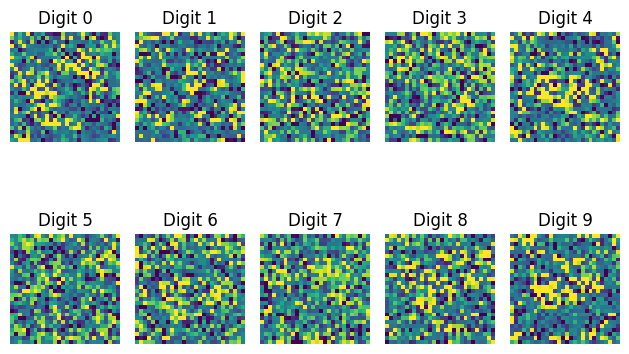

Step 0, Loss: -11.9127
Step 100, Loss: -0.0004
Step 200, Loss: -0.0004
Step 300, Loss: -0.0004
Step 400, Loss: -0.0004
Step 500, Loss: -0.0004
Step 600, Loss: -0.0004
Step 700, Loss: -0.0004
Step 800, Loss: -0.0004
Step 900, Loss: -0.0004


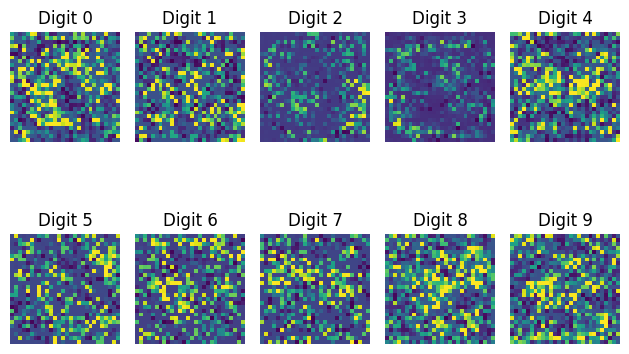

Step 0, Loss: -12.0731
Step 100, Loss: -0.0041
Step 200, Loss: -0.0039
Step 300, Loss: -0.0037
Step 400, Loss: -0.0035
Step 500, Loss: -0.0033
Step 600, Loss: -0.0031
Step 700, Loss: -0.0029
Step 800, Loss: -0.0028
Step 900, Loss: -0.0026


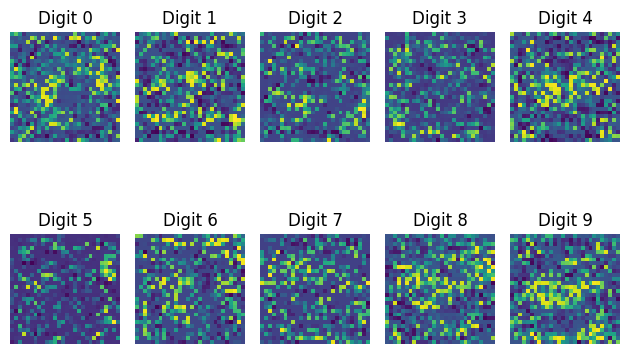

Step 0, Loss: -14.9582
Step 100, Loss: -0.0357
Step 200, Loss: -0.0283
Step 300, Loss: -0.0225
Step 400, Loss: -0.0180
Step 500, Loss: -0.0146
Step 600, Loss: -0.0119
Step 700, Loss: -0.0098
Step 800, Loss: -0.0082
Step 900, Loss: -0.0069


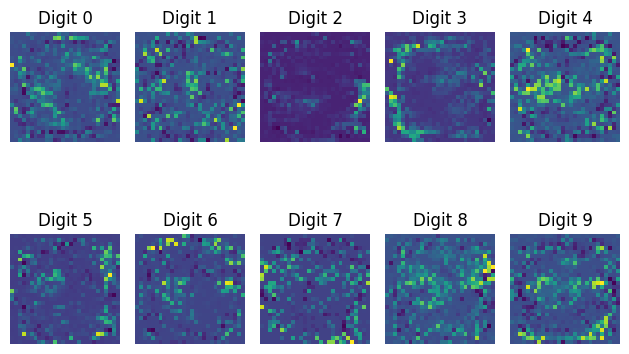

Step 0, Loss: -13.6154
Step 100, Loss: -0.1636
Step 200, Loss: -0.0662
Step 300, Loss: -0.0339
Step 400, Loss: -0.0218
Step 500, Loss: -0.0168
Step 600, Loss: -0.0147
Step 700, Loss: -0.0139
Step 800, Loss: -0.0135
Step 900, Loss: -0.0133


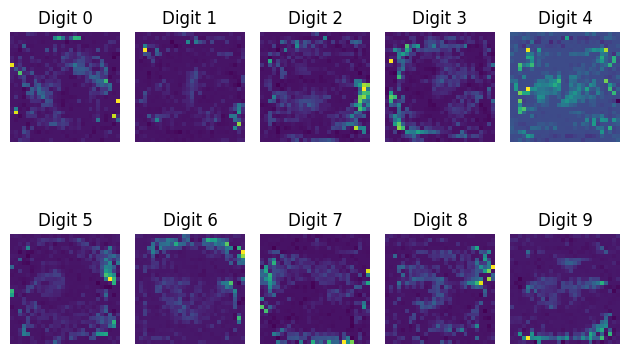

Step 0, Loss: -23.2368
Step 100, Loss: -0.1540
Step 200, Loss: -0.0814
Step 300, Loss: -0.0781
Step 400, Loss: -0.0780
Step 500, Loss: -0.0780
Step 600, Loss: -0.0780
Step 700, Loss: -0.0780
Step 800, Loss: -0.0780
Step 900, Loss: -0.0780


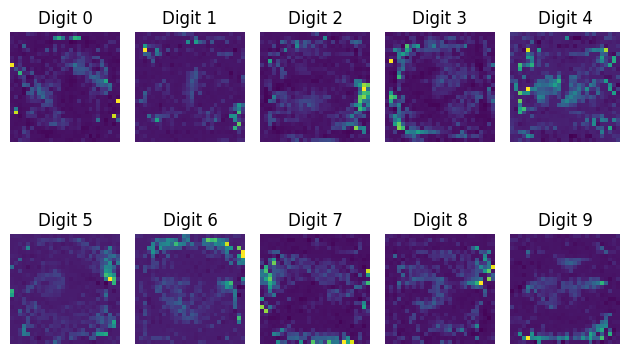

In [51]:
for_animation = dreaming(lambda_l2=0)

lambda_l2 = 0.001

for i in range(5):
    for_animation = dreaming(lambda_l2=lambda_l2 * (10 ** i))
    # animation(for_animation)